In [21]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
import pickle as pkl
import string
from itertools import cycle

In [22]:
plt.style.use(r'C:\Users\Simon Syga\PycharmProjects\biolgca\frontiers_style.mplstyle')

In [23]:
def label_axes(fig, labels=None, loc=None, **kwargs):
    """
    Walks through axes and labels each.

    kwargs are collected and passed to `annotate`

    Parameters
    ----------
    fig : Figure
         Figure object to work on

    labels : iterable or None
        iterable of strings to use to label the axes.
        If None, lower case letters are used.

    loc : len=2 tuple of floats
        Where to put the label in axes-fraction units
    """
    if labels is None:
        labels = string.ascii_uppercase

    # re-use labels rather than stop labeling
    labels = cycle(labels)
    if loc is None:
        loc = (-0.05, 1.15)
    for ax, lab in zip(fig.axes, labels):
        ax.annotate(lab, xy=loc, ha='right', weight='bold', size=10,
                    xycoords='axes fraction',
                    **kwargs)

In [36]:
restchannels = 1
l = 1001
dims = l, l
capacity = 100
# interaction parameters
r_b = 1. # initial birth rate
r_d = 0.2 # initial death rate
nodes = np.zeros((l,)+(2+restchannels,), dtype=int)
nodes[l//2, -1] = capacity
kappa = np.random.random(capacity) * 8 - 4

In [37]:
lgca = get_lgca(ib=True, bc='reflect', interaction='go_or_grow_kappa', dims=l, nodes=nodes, ve=False, geometry='lin',
                r_b=r_b, capacity=capacity, r_d=r_d, kappa=kappa, theta=.2, kappa_std=.2)

lgca.timeevo(1000, record=True, recordN=False)
with open('example_lgca.pkl', 'wb') as f:
    pkl.dump(lgca, f)
# lgca = pkl.load(open('example_lgca.pkl', 'rb'))

100%|██████████| 1000/1000 [30:56<00:00,  1.86s/it]


In [26]:
# plt.style.use('./frontiers_style.mplstyle')
#
# kappas = lgca.get_prop(propname='kappa')
# # anim = lgca.animate_density()
# # plt.plot(lgca.n_t)
# plt.hist(kappas, bins='auto', density=True, log=True)
# # label axes
# plt.xlabel(r'$\kappa$')
# plt.ylabel(r'Distribution')
# plt.savefig(r'goorgrow/figures/kappa_distribution.svg')
# plt.savefig(r'goorgrow/figures/kappa_distribution.pdf')

In [27]:
# plt.figure(figsize=figsize)
# lgca.plot_prop_spatial(propname='kappa', cbarlabel=r'$\kappa$')
# plt.ylabel(r'Time $k$')
# plt.xlabel(r'Lattice node $r$')
# plt.savefig(r'goorgrow/figures/local_kappa.svg')
# plt.show()

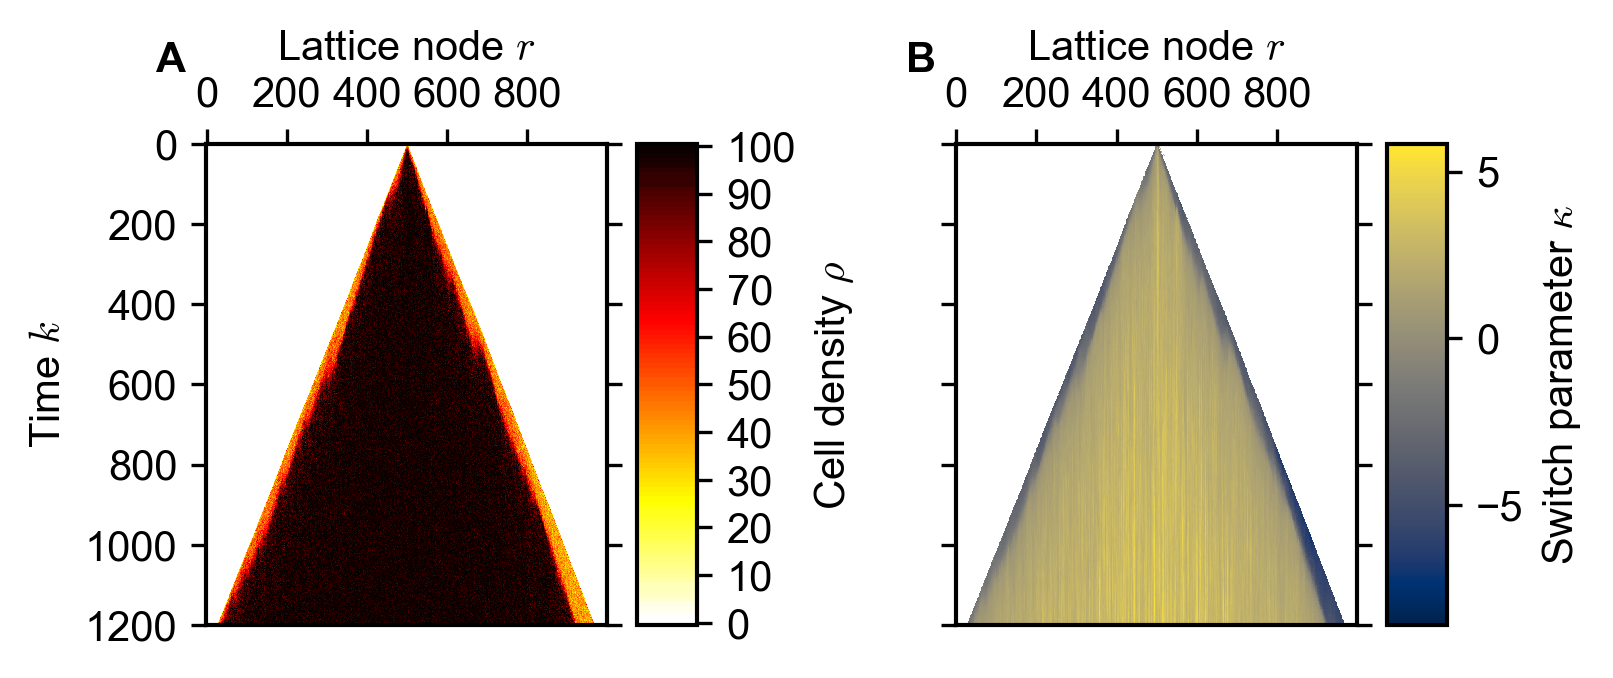

In [28]:
plt.style.use(r'C:\Users\Simon Syga\PycharmProjects\biolgca/frontiers_style.mplstyle')
# get figsize from style
figsize = plt.rcParams['figure.figsize']
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
plt.sca(axes[0])
lgca.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$')
plt.ylabel(r'Time $k$')
plt.xlabel(r'Lattice node $r$')
# get colorbar of current axes
# cbar.set_label(r'Cell density $\rho$')
plt.sca(axes[1])
lgca.plot_prop_spatial(propname='kappa', cbarlabel=r'Switch parameter $\kappa$', figsize=figsize)
plt.ylabel(r'')
plt.xlabel(r'Lattice node $r$')
label_axes(fig, labels=['A', 'B', '', ''])
plt.tight_layout()
# plt.savefig(r'goorgrow/figures/cell_density_and_local_kappa.svg')
# plt.savefig(r'goorgrow/figures/cell_density_and_local_kappa.pdf')


ValueError: 'x' and 'y' must have the same size

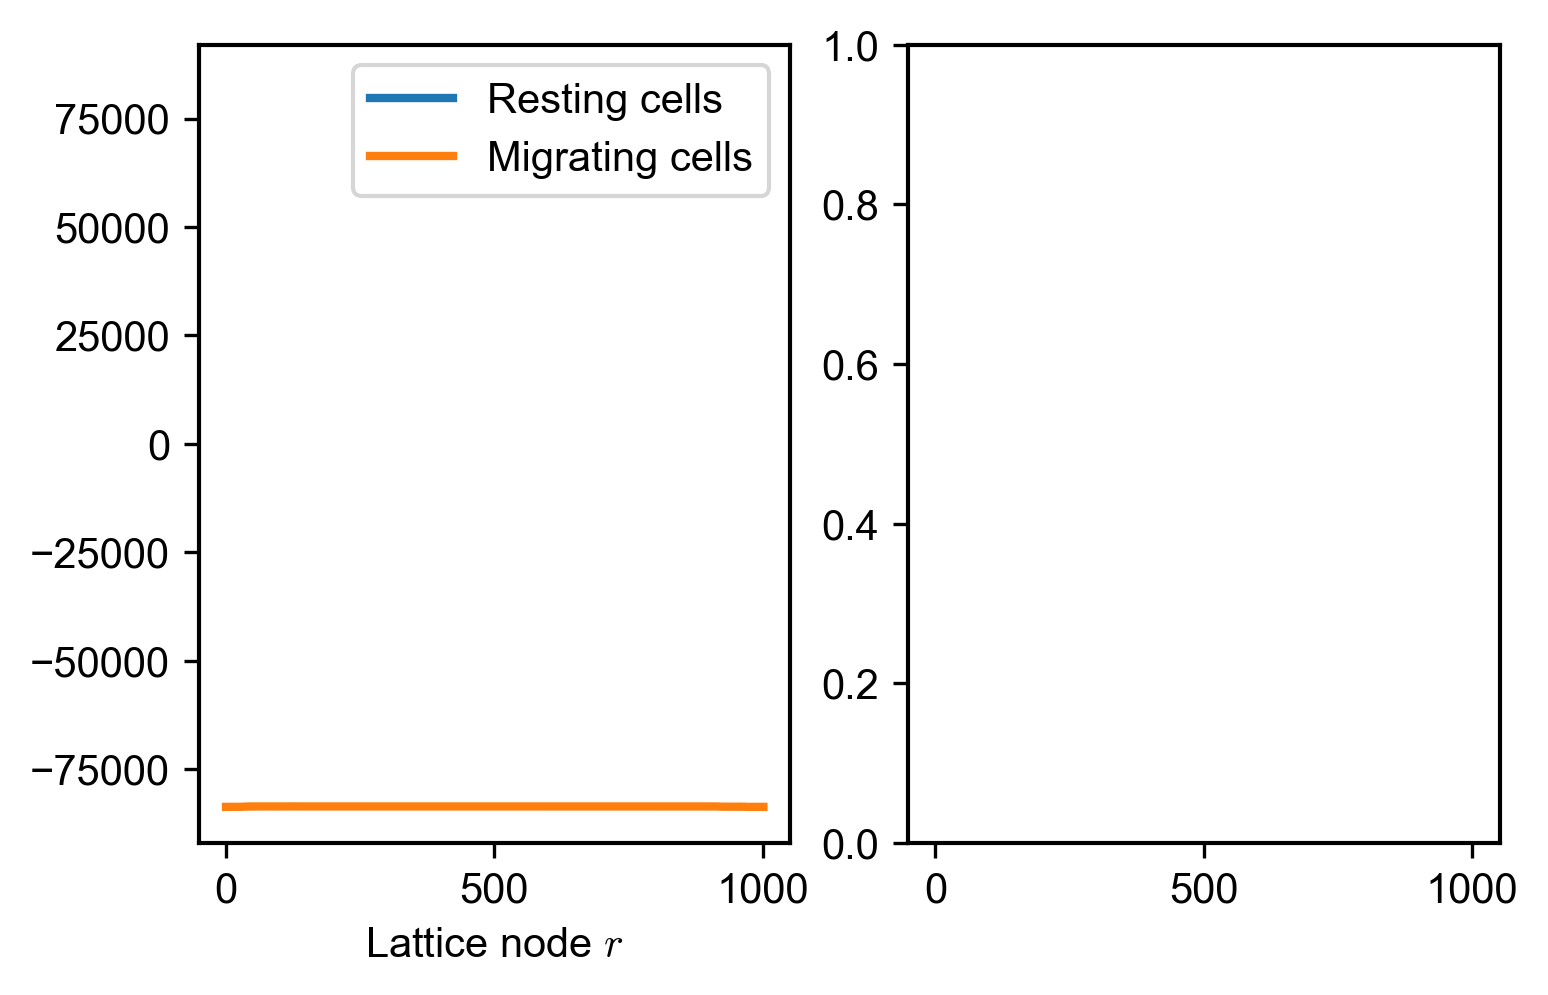

In [32]:
plt.style.use(r'C:\Users\Simon Syga\PycharmProjects\biolgca/frontiers_style.mplstyle')
# get figsize from style
figsize = plt.rcParams['figure.figsize']
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False)
plt.sca(axes[0])
lgca.update_dynamic_fields()
resting_cells = lgca.channel_pop[:, -1].sum(-1)
migrating_cells = lgca.cell_density - resting_cells
plt.plot(resting_cells, label='Resting cells')
plt.plot(migrating_cells, label='Migrating cells')
plt.legend()
# plt.ylabel(r'Time $k$')
plt.xlabel(r'Lattice node $r$')
# get colorbar of current axes
# cbar.set_label(r'Cell density $\rho$')
plt.sca(axes[1])
cells = lgca.nodes.sum(-1)
mean_prop = np.ma.masked_all(cells.shape)
std_prop = np.ma.masked_all(cells.shape)
proparray = np.array(lgca.props['kappa'])
for ind, loccells in np.ndenumerate(cells):
    if loccells:
        nodeprops = proparray[loccells]
        mean_prop[ind] = nodeprops.mean()
        std_prop[ind] = nodeprops.std()
        mean_prop.mask[ind] = 0
        std_prop.mask[ind] = 0

plt.errorbar(np.arange(l), mean_prop, yerr=std_prop, label=r'$\kappa$')
plt.ylabel(r'')
plt.xlabel(r'Lattice node $r$')
label_axes(fig, labels=['A', 'B', '', ''])
plt.tight_layout()

In [33]:
migrating_cells

array([-83681, -83681, -83681, ..., -83681, -83681, -83681])